<a href="https://colab.research.google.com/github/xpandalord/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [54]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
plt.style.use('fast')

In [56]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [57]:
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [58]:
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
214,1,3,male,25.0,7.7750,Southampton,third
673,0,3,male,42.0,7.5500,Southampton,third
129,0,3,male,26.0,7.7750,Southampton,third
239,0,1,female,2.0,151.5500,Southampton,first
556,0,3,female,18.0,14.4542,Cherbourg,third


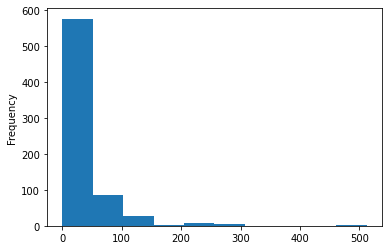

In [59]:
titanic['Fare'].plot(kind = 'hist');

In [60]:
print(titanic.shape)
titanic = titanic[titanic['Fare'] < 500]
print(titanic.shape)

(712, 7)
(709, 7)


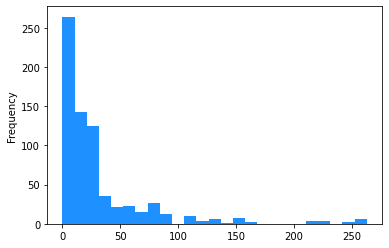

In [61]:
titanic['Fare'].plot(kind = 'hist', color = 'dodgerblue', bins = 25);

In [62]:
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [63]:
farelabels = ['low', 'medium', 'high', 'vhigh']
titanic['fare_groups'] = pd.cut(titanic['Fare'], bins = [0,8,15,32,264], labels = farelabels)
titanic[['Fare', 'fare_groups']].head()

,Fare,fare_groups
0,7.2500,low
1,71.2833,vhigh
2,7.9250,low
3,53.1000,vhigh
4,8.0500,medium


In [0]:
fare_results = titanic['fare_groups'].value_counts().sort_index()

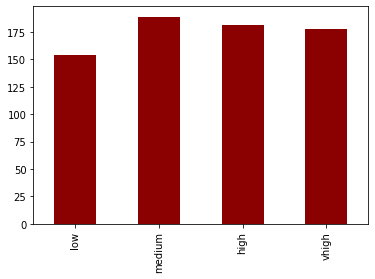

In [65]:
fare_results.plot(kind = 'bar', color = 'darkred');

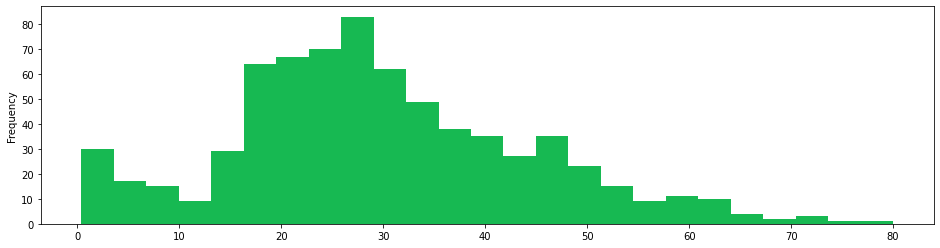

In [66]:
titanic['Age'].plot(kind = 'hist',
                    bins = 25,
                    figsize = (16,4),
                    color = '#17B952');

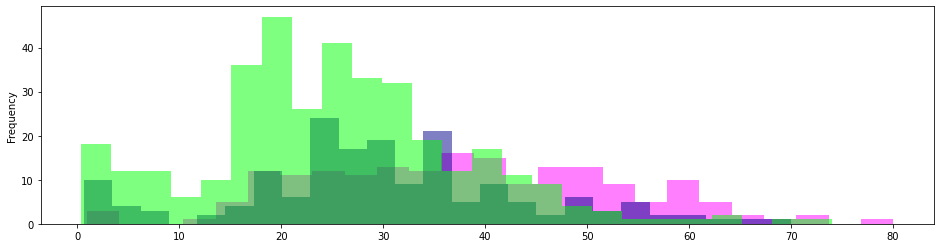

In [67]:
titanic[titanic['Pclass'] == 1]['Age'].plot(kind = 'hist',
                                            bins = 25,
                                            figsize = (16,4),
                                            color = 'magenta',
                                            alpha = 0.5)
titanic[titanic['Pclass'] == 2]['Age'].plot(kind = 'hist',
                                            bins = 25,
                                            figsize = (16,4),
                                            color = 'darkblue',
                                            alpha = 0.5)
titanic[titanic['Pclass'] == 3]['Age'].plot(kind = 'hist',
                                            bins = 25,
                                            figsize = (16,4),
                                            color = 'lime',
                                            alpha = 0.5);

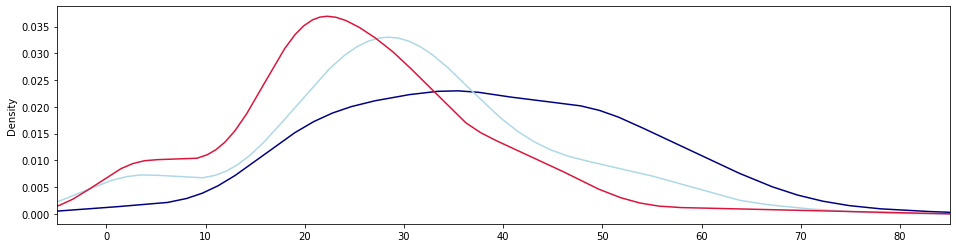

In [68]:
titanic[titanic['Pclass'] == 1]['Age'].plot(kind = 'density',
                                            figsize = (16,4),
                                            color = 'navy',
                                            xlim = (-5,85))
titanic[titanic['Pclass'] == 2]['Age'].plot(kind = 'density',
                                            figsize = (16,4),
                                            color = 'lightblue',
                                            xlim = (-5,85))
titanic[titanic['Pclass'] == 3]['Age'].plot(kind = 'density',
                                            figsize = (16,4),
                                            color = 'crimson',
                                            xlim = (-5,85));

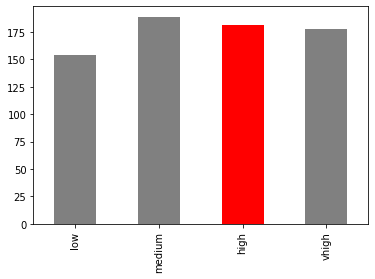

In [69]:
titanic['fare_groups'].value_counts().sort_index().plot(kind = 'bar',
                                                        color = ['gray', 'gray', 'red', 'gray']);

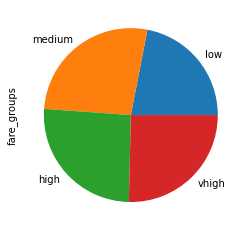

In [70]:
titanic['fare_groups'].value_counts().sort_index().plot(kind = 'pie',
                                                        figsize = (4,4));

In [71]:
cab_death = pd.crosstab(titanic['cabin_class'], titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


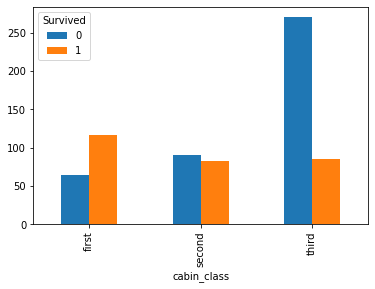

In [72]:
cab_death.plot(kind = 'bar');

In [73]:
cab_death1 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize = 'columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


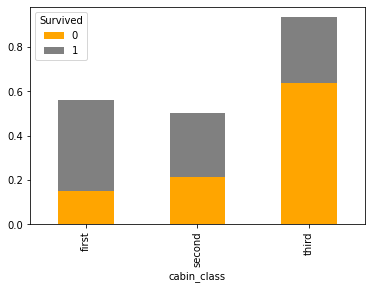

In [74]:
cab_death1.plot(kind = 'bar',
                stacked = True,
                color = ['orange', 'gray']);

In [75]:
cab_death2 = pd.crosstab(titanic['cabin_class'],
                         titanic['Survived'],
                         normalize = 'index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


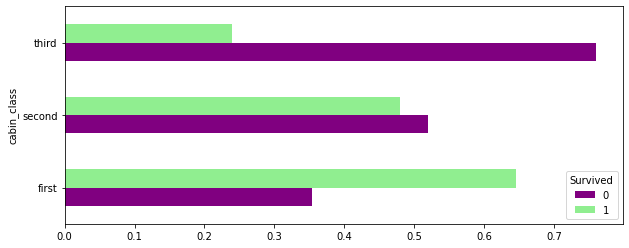

In [76]:
cab_death2.plot(kind = 'barh',
                color = ['purple', 'lightgreen'],
                figsize = (10,4));

In [77]:
titanic['Age'].describe()
titanic['Age'].mean()
titanic['Age'].median()
titanic['Age'].std()
titanic['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [78]:
cab_age = titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

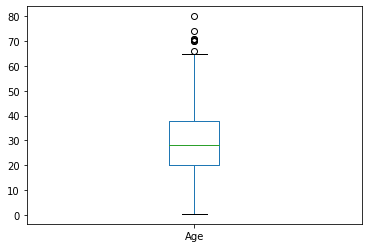

In [79]:
titanic['Age'].plot(kind = 'box');

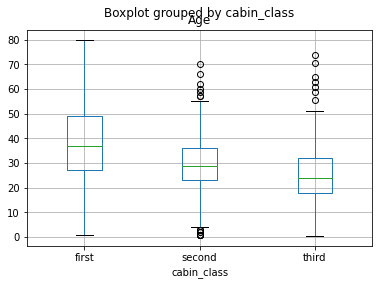

In [80]:
plt.style.use('fast')
titanic.boxplot(column = 'Age',
                by = 'cabin_class');

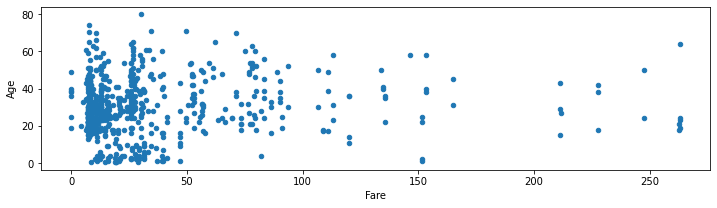

In [81]:
titanic.plot(kind = 'scatter',
             x = 'Fare',
             y = 'Age',
             figsize = (12,3));

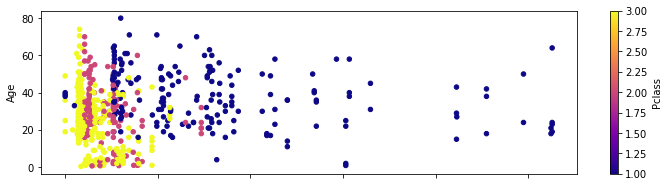

In [82]:
plt.style.use('fast')
titanic.plot(kind = 'scatter',
             x = 'Fare',
             y = 'Age',
             c = 'Pclass',
             colormap = 'plasma',
             figsize = (12,3));

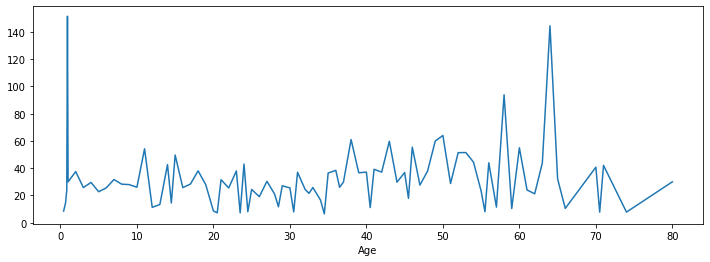

In [83]:
titanic.groupby('Age')['Fare'].mean().plot(kind = 'line',
                                           figsize = (12,4));

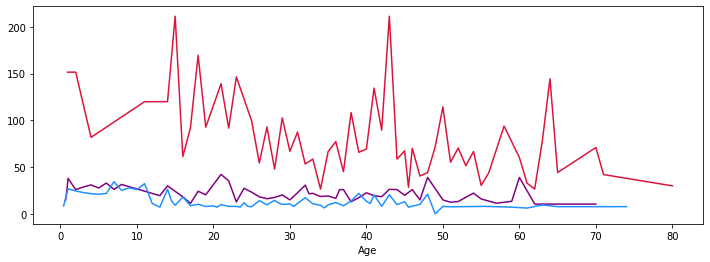

In [85]:
mycolors = ['crimson', 'purple', 'dodgerblue']
for x in [1,2,3]:
  titanic[titanic['Pclass'] == x].groupby('Age')['Fare'].mean().plot(figsize = (12,4),
                                                                     color = mycolors[x-1]);

In [86]:
titanic.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


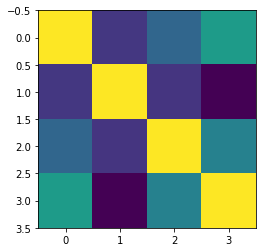

In [87]:
plt.imshow(titanic.corr());

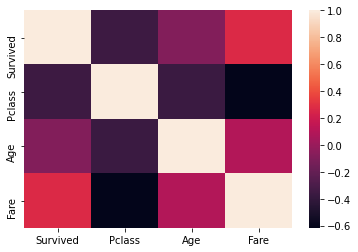

In [88]:
sns.heatmap(titanic.corr());

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [90]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [91]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

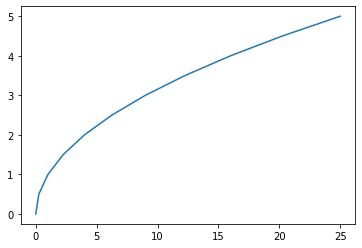

In [92]:
plt.plot(y, x);

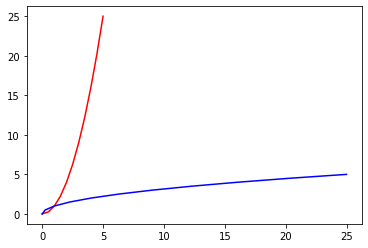

In [93]:
plt.plot(x, y, 'r')
plt.plot(y, x, 'b');

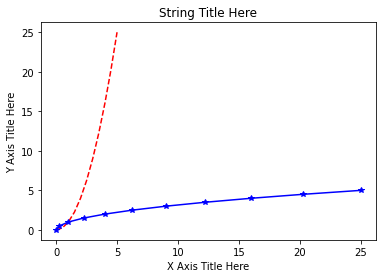

In [94]:
plt.plot(x, y, 'r--')
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

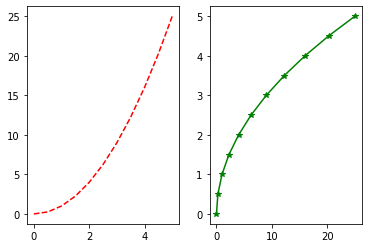

In [95]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')
plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-');

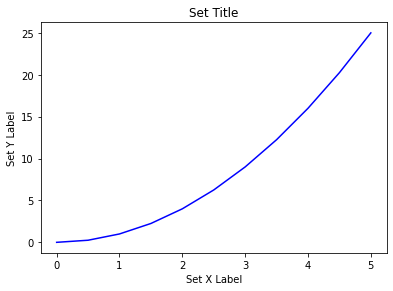

In [96]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label')
axes.set_ylabel('Set Y Label')
axes.set_title('Set Title');

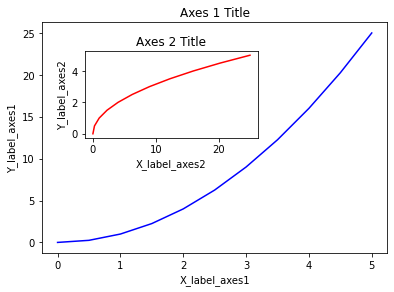

In [97]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

2) Reproduce another example from FiveThityEight's shared data repository.
WARNING: There are a lot of very custom graphs and tables at the above link. I highly recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, seaborn relplot, etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib.

If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought.

If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

In [224]:
!unzip /content/covid-19-polls-master.zip

Archive:  /content/covid-19-polls-master.zip
3141c8c09b0bf0ddf8c62272630acd9b1b6ba0a7
replace covid-19-polls-master/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: covid-19-polls-master/README.md  
  inflating: covid-19-polls-master/covid_approval_polls.csv  
  inflating: covid-19-polls-master/covid_approval_polls_adjusted.csv  
  inflating: covid-19-polls-master/covid_approval_toplines.csv  
  inflating: covid-19-polls-master/covid_concern_polls.csv  
  inflating: covid-19-polls-master/covid_concern_polls_adjusted.csv  
  inflating: covid-19-polls-master/covid_concern_toplines.csv  


In [232]:
concern_toplines = pd.read_csv('/content/covid-19-polls-master/covid_concern_toplines.csv')
concern_toplines

,subject,modeldate,party,very_estimate,somewhat_estimate,not_very_estimate,not_at_all_estimate,timestamp
0,concern-infected,5/14/2020,all,31.731098,36.250174,19.809888,11.731546,18:00:12 14 May 2020
1,concern-economy,5/14/2020,all,55.577297,30.988506,8.653979,3.137298,18:00:11 14 May 2020
2,concern-infected,5/13/2020,all,31.479767,35.992653,20.049036,11.941353,17:10:10 13 May 2020
3,concern-economy,5/13/2020,all,55.644390,30.923093,8.790840,3.070668,17:10:09 13 May 2020
4,concern-infected,5/12/2020,all,32.708295,36.028250,19.416241,11.358560,23:05:11 12 May 2020
...,...,...,...,...,...,...,...,...
175,concern-economy,2/17/2020,all,22.756400,32.289010,24.015140,8.969726,17:46:12 2 Apr 2020
176,concern-economy,2/16/2020,all,22.756400,32.289010,24.015140,8.969726,17:46:12 2 Apr 2020
177,concern-infected,2/16/2020,all,16.427300,24.806250,37.797340,19.744810,17:46:32 2 Apr 2020
178,concern-economy,2/15/2020,all,22.756400,32.289010,24.015140,8.969726,17:46:12 2 Apr 2020


In [226]:
concern_toplines_reduced = concern_toplines[['subject', 'modeldate', 'very_estimate', 'somewhat_estimate', 
                    'not_very_estimate', 'not_at_all_estimate']]
concern_toplines_reduced.head()

,subject,modeldate,very_estimate,somewhat_estimate,not_very_estimate,not_at_all_estimate
0,concern-infected,5/14/2020,31.731098,36.250174,19.809888,11.731546
1,concern-economy,5/14/2020,55.577297,30.988506,8.653979,3.137298
2,concern-infected,5/13/2020,31.479767,35.992653,20.049036,11.941353
3,concern-economy,5/13/2020,55.644390,30.923093,8.790840,3.070668
4,concern-infected,5/12/2020,32.708295,36.028250,19.416241,11.358560


In [227]:
condition = concern_toplines_reduced['subject'] == 'concern-infected'
infected_toplines = concern_toplines_reduced[condition]
infected_toplines

,subject,modeldate,very_estimate,somewhat_estimate,not_very_estimate,not_at_all_estimate
0,concern-infected,5/14/2020,31.731098,36.250174,19.809888,11.731546
2,concern-infected,5/13/2020,31.479767,35.992653,20.049036,11.941353
4,concern-infected,5/12/2020,32.708295,36.028250,19.416241,11.358560
6,concern-infected,5/11/2020,32.834497,35.970886,19.390422,11.301951
8,concern-infected,5/10/2020,32.816567,35.953075,19.422994,11.314738
...,...,...,...,...,...,...
171,concern-infected,2/19/2020,18.434920,23.517890,36.318410,20.996640
172,concern-infected,2/18/2020,18.434920,23.517890,36.318410,20.996640
174,concern-infected,2/17/2020,16.427300,24.806250,37.797340,19.744810
177,concern-infected,2/16/2020,16.427300,24.806250,37.797340,19.744810


In [228]:
infected_toplines['modeldate'] = pd.to_datetime(infected_toplines['modeldate'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
plt.style.use('fivethirtyeight')

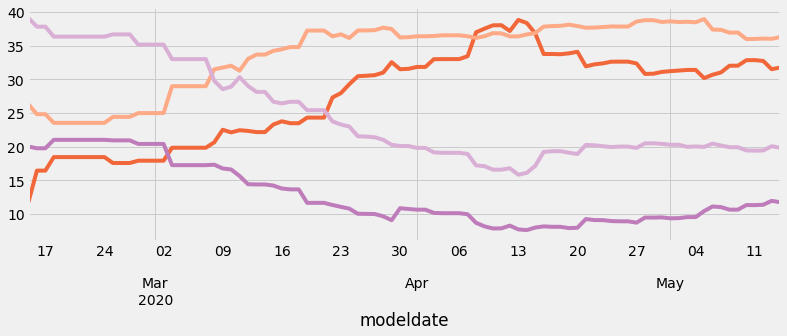

In [230]:
concerns = ['very_estimate', 'somewhat_estimate', 'not_very_estimate', 'not_at_all_estimate']
mycolors = ['#f26739', '#feaa87', '#daafd6', '#bf7cbb']
for x in [0,1,2,3]:
  infected_toplines.groupby('modeldate')[concerns[x]].max().plot(figsize = (12,4), color = mycolors[x])

In [233]:
concern_polls = pd.read_csv('/content/covid-19-polls-master/covid_concern_polls.csv')
concern_polls

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,very,somewhat,not_very,not_at_all,url
0,2020-05-08,2020-05-13,Global Strategy Group/GBAO/Navigator Research,NaN,1010,rv,all,concern-economy,True,Below are some things some people might be wor...,45.0,41.0,9.0,4.0,https://navigatorresearch.org/wp-content/uploa...
1,2020-05-07,2020-05-12,Global Strategy Group/GBAO/Navigator Research,NaN,1009,rv,all,concern-economy,True,Below are some things some people might be wor...,45.0,41.0,11.0,3.0,https://navigatorresearch.org/wp-content/uploa...
2,2020-05-08,2020-05-11,Ipsos (online),Axios,980,a,all,concern-economy,False,"How concerned are you, if at all, with the fol...",60.0,28.0,8.0,3.0,https://www.ipsos.com/sites/default/files/ct/n...
3,2020-05-06,2020-05-11,Global Strategy Group/GBAO/Navigator Research,NaN,1020,rv,all,concern-economy,True,Below are some things some people might be wor...,48.0,40.0,9.0,3.0,https://navigatorresearch.org/wp-content/uploa...
4,2020-05-08,2020-05-10,Harris Poll,NaN,2030,a,all,concern-economy,False,How concerned are you about the impact coronav...,51.0,33.0,11.0,5.0,https://theharrispoll.com/wp-content/uploads/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020-02-13,2020-02-18,Kaiser Family Foundation,NaN,1207,a,all,concern-infected,False,"How concerned, if at all, are you that you or ...",22.0,21.0,33.0,23.0,http://files.kff.org/attachment/Topline-KFF-He...
275,2020-02-13,2020-02-16,AP-NORC,NaN,1074,a,all,concern-infected,False,How worried are you about you or someone in yo...,22.0,23.0,37.0,19.0,http://www.apnorc.org/PDFs/Omnibus%202020/Febr...
276,2020-02-09,2020-02-11,YouGov,Economist,1500,a,all,concern-infected,False,Taking into consideration both your risk of co...,11.0,28.0,39.0,22.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
277,2020-02-07,2020-02-09,YouGov,Huffington Post,1000,a,all,concern-infected,False,How concerned are you that you or someone in y...,11.0,24.0,33.0,20.0,https://projects.fivethirtyeight.com/polls/202...


In [236]:
concern_polls_reduced = concern_polls[['subject', 'start_date', 'end_date', 'very', 'somewhat', 
                    'not_very', 'not_at_all']]
concern_polls_reduced

,subject,start_date,end_date,very,somewhat,not_very,not_at_all
0,concern-economy,2020-05-08,2020-05-13,45.0,41.0,9.0,4.0
1,concern-economy,2020-05-07,2020-05-12,45.0,41.0,11.0,3.0
2,concern-economy,2020-05-08,2020-05-11,60.0,28.0,8.0,3.0
3,concern-economy,2020-05-06,2020-05-11,48.0,40.0,9.0,3.0
4,concern-economy,2020-05-08,2020-05-10,51.0,33.0,11.0,5.0
...,...,...,...,...,...,...,...
274,concern-infected,2020-02-13,2020-02-18,22.0,21.0,33.0,23.0
275,concern-infected,2020-02-13,2020-02-16,22.0,23.0,37.0,19.0
276,concern-infected,2020-02-09,2020-02-11,11.0,28.0,39.0,22.0
277,concern-infected,2020-02-07,2020-02-09,11.0,24.0,33.0,20.0


In [237]:
condition = concern_polls_reduced['subject'] == 'concern-infected'
infected = concern_polls_reduced[condition]
infected

,subject,start_date,end_date,very,somewhat,not_very,not_at_all
81,concern-infected,2020-05-13,2020-05-14,36.00,43.00,17.00,5.00
82,concern-infected,2020-05-11,2020-05-13,32.00,40.00,18.00,9.00
83,concern-infected,2020-05-08,2020-05-13,45.00,34.00,15.00,7.00
84,concern-infected,2020-05-08,2020-05-13,30.00,35.00,24.00,11.00
85,concern-infected,2020-05-12,2020-05-12,33.67,39.51,16.44,9.85
...,...,...,...,...,...,...,...
274,concern-infected,2020-02-13,2020-02-18,22.00,21.00,33.00,23.00
275,concern-infected,2020-02-13,2020-02-16,22.00,23.00,37.00,19.00
276,concern-infected,2020-02-09,2020-02-11,11.00,28.00,39.00,22.00
277,concern-infected,2020-02-07,2020-02-09,11.00,24.00,33.00,20.00


In [239]:
infected['start_date'] = pd.to_datetime(infected['start_date'])
infected['end_date'] = pd.to_datetime(infected['end_date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


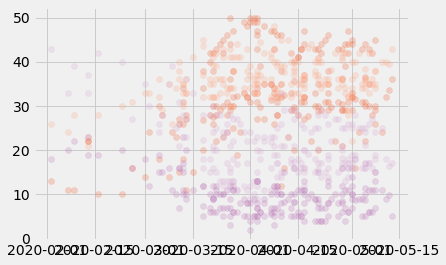

In [254]:
concerns = ['very', 'somewhat', 'not_very', 'not_at_all']
for i in [0,1,2,3]:
  plt.scatter(infected['start_date'], infected[concerns[i]], color = mycolors[i], alpha = 0.25)

<Figure size 1800x360 with 0 Axes>

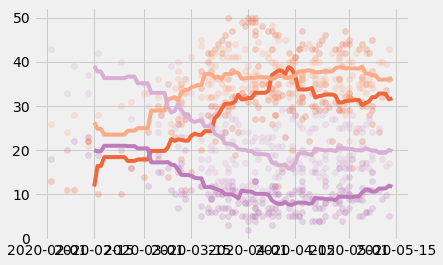

<Figure size 1800x360 with 0 Axes>

In [266]:
concerns = ['very', 'somewhat', 'not_very', 'not_at_all']
concerns_toplines = ['very_estimate', 'somewhat_estimate', 'not_very_estimate', 'not_at_all_estimate']
mycolors = ['#f26739', '#feaa87', '#daafd6', '#bf7cbb']
for i in [0,1,2,3]:
  plt.plot(infected_toplines['modeldate'], infected_toplines[concerns_toplines[i]], color = mycolors[i])
  plt.scatter(infected['start_date'], infected[concerns[i]], color = mycolors[i], alpha = 0.25)
plt.figure(figsize = (25,5))

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here